### 高考预测

In [1]:
# 导入库
import pandas as pd

In [2]:
# 加载数据
datas = pd.read_csv('dataset/students_school.csv')

In [3]:
#去除空值
datas.dropna(inplace=True)


In [4]:
# 查看数据
datas.head()

,chinese,math,english,total,school,ifpass
0,87,39,101,104,535,0
1,97,145,73,159,424,0
2,134,102,52,137,417,1
3,116,126,102,134,467,1
4,102,126,124,240,365,0


In [5]:
# 只保留需要的特征值（去掉后面四个）


In [6]:
# 查看数据
datas.head()

,chinese,math,english,total,school,ifpass
0,87,39,101,104,535,0
1,97,145,73,159,424,0
2,134,102,52,137,417,1
3,116,126,102,134,467,1
4,102,126,124,240,365,0


In [7]:
# 创建特征值和目标值（第一列到倒数第二列为特征值，最后一列为目标值）
X = datas.iloc[:, :-1]
y = datas.iloc[:, -1]



In [8]:
# 拆分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)







In [9]:
# 创建决策树模型
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [10]:
# 训练模型
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [11]:
# 预测结果
y_pred = dtc.predict(X_test)

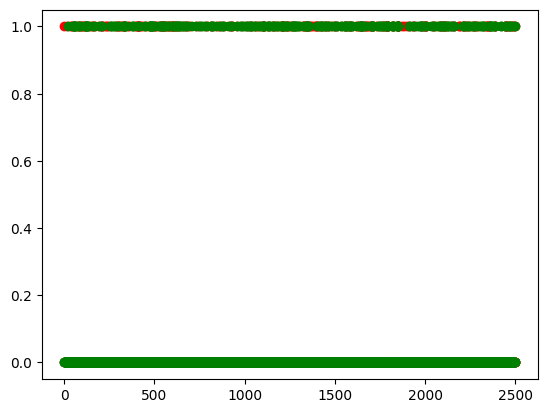

In [12]:
# 可视化预测结果与真实结果的对比 使用散点图
import matplotlib.pyplot as plt
plt.scatter(range(len(y_pred)), y_pred, c='r')
plt.scatter(range(len(y_test)), y_test, c='g')
plt.show()

In [13]:
# 查看模型的准确率
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8768

In [14]:
# 查看模型的混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2056,  158],
       [ 150,  136]], dtype=int64)

In [15]:
# 查看模型的分类报告
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2214
           1       0.46      0.48      0.47       286

    accuracy                           0.88      2500
   macro avg       0.70      0.70      0.70      2500
weighted avg       0.88      0.88      0.88      2500



In [16]:
# 可视化决策树
from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file='tree.dot')

In [17]:
# 使用graphviz库将决策树可视化
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()

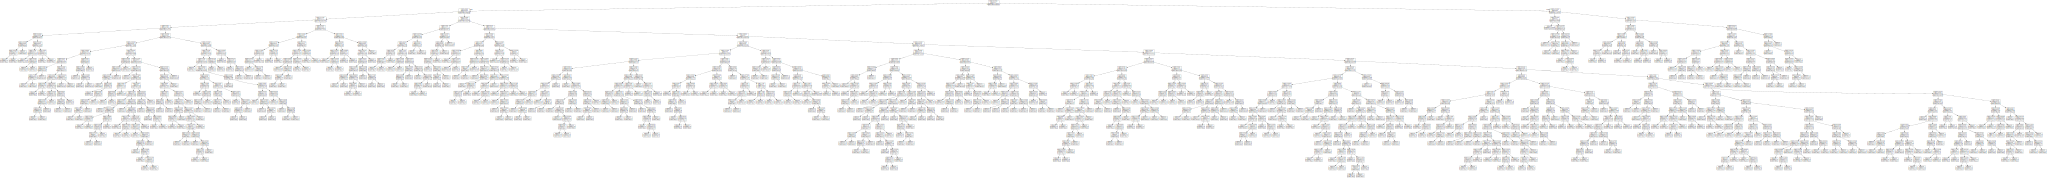

In [18]:
graphviz.Source(dot_graph)

In [19]:
# 保存决策树可视化图像
graphviz.Source(dot_graph).render('tree')

'tree.pdf'

In [20]:
# 保存决策树模型
import joblib
joblib.dump(dtc, 'model/dtc.pkl')

['model/dtc.pkl']

In [21]:
# 加载决策树模型
model = joblib.load('model/dtc.pkl')

In [22]:

inputs = pd.DataFrame([[100,100,90,500,200]], columns=['chinese', 'math', 'english','total', 'school'])
model.predict(inputs.loc[:])

array([0], dtype=int64)